In [ ]:
import requests

In [ ]:
subscriptoin_key = 'subscription_key'

In [ ]:
face_api_url = 'https://minfaceapi.cognitiveservices.azure.com/face/v1.0/detect'

In [ ]:
image_url = 'http://www.nbnnews.co.kr/news/photo/202109/613420_612983_3339.jpg'

In [ ]:
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [ ]:
img = Image.open(BytesIO(requests.get(image_url).content))

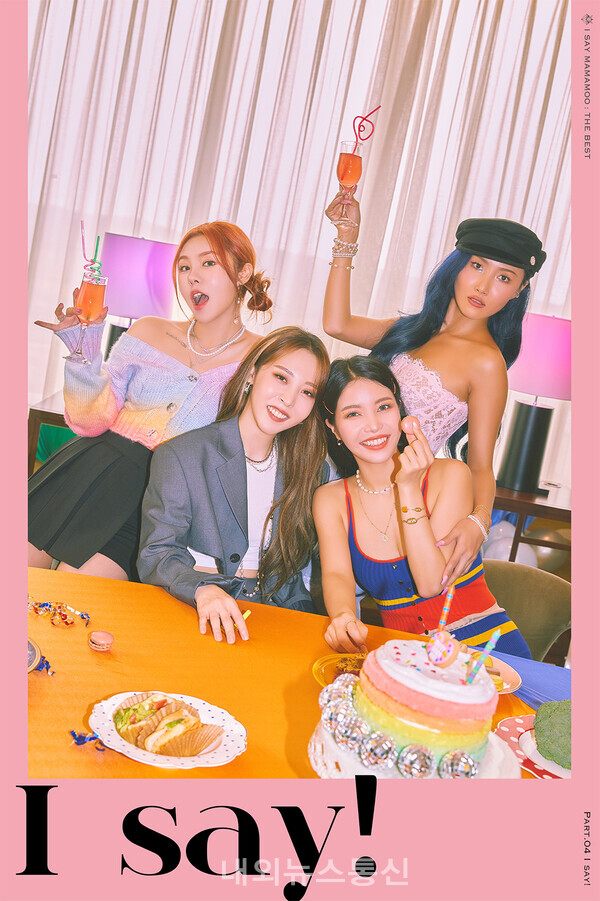

In [ ]:
img

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscriptoin_key}

In [ ]:
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender'
}

In [ ]:
data = {'url': image_url}

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)

In [ ]:
response

<Response [200]>

In [ ]:
faces = response.json()

In [ ]:
faces

[{'faceAttributes': {'age': 23.0, 'gender': 'female'},
  'faceRectangle': {'height': 66, 'left': 253, 'top': 365, 'width': 66}},
 {'faceAttributes': {'age': 25.0, 'gender': 'female'},
  'faceRectangle': {'height': 66, 'left': 338, 'top': 392, 'width': 66}},
 {'faceAttributes': {'age': 28.0, 'gender': 'female'},
  'faceRectangle': {'height': 64, 'left': 451, 'top': 254, 'width': 64}},
 {'faceAttributes': {'age': 20.0, 'gender': 'female'},
  'faceRectangle': {'height': 59, 'left': 168, 'top': 251, 'width': 59}}]

In [ ]:
def CreateImage(faces):
  for face in faces:
    rect = face['faceRectangle']

    left = rect['left']
    top = rect['top']
    bottom = left + rect['height']
    right = top + rect['width']

    draw.rectangle(((left, top), (bottom, right)), outline='red')
    
    faceInfo = face['faceAttributes']
    gender = faceInfo['gender']
    age = faceInfo['age']

    temp = 'Gender: ' + gender + ' Age: ' + str(age)

    fontX = left
    fontY = top - 10

    draw.text((fontX, fontY), temp, fill='red')


In [ ]:
draw = ImageDraw.Draw(img)

In [ ]:
CreateImage(faces)

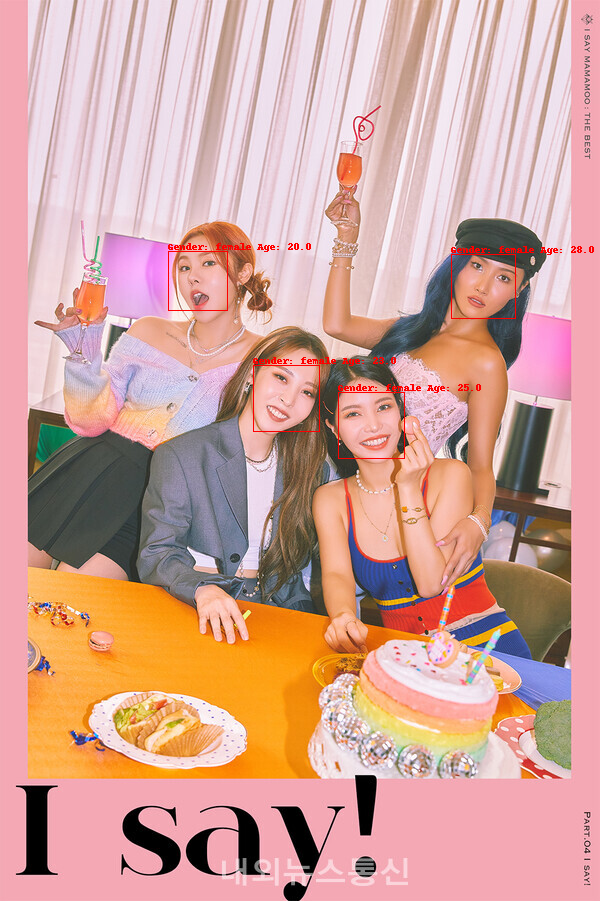

In [ ]:
img

In [ ]:
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'emotion'
}

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)

In [ ]:
response.json()

[{'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}},
  'faceRectangle': {'height': 66, 'left': 253, 'top': 365, 'width': 66}},
 {'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}},
  'faceRectangle': {'height': 66, 'left': 338, 'top': 392, 'width': 66}},
 {'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.001,
    'neutral': 0.983,
    'sadness': 0.001,
    'surprise': 0.014}},
  'faceRectangle': {'height': 64, 'left': 451, 'top': 254, 'width': 64}},
 {'faceAttributes': {'emotion': {'anger': 0.001,
    'contempt': 0.001,
    'disgust': 0.001,
    'fear': 0.002,
    'happiness': 0.145,
    'neutral': 0.135,
    'sadness': 0.007,
    'surprise': 0